In [8]:
import torch
import torch.nn as nn 
import torch.optim as optim
from DataLoaders import UniformNoiseLoader, FixedPointsLoader, RandomPointsLoader
import matplotlib.pyplot as plt
from Models import RotationNN
from utils import plot_image, line_image, cat_image, rotate_flat_image
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
image_size = 64

model = RotationNN(image_size * image_size)

In [ ]:
num_samples = 1000
batch_size = 200

#loader = UniformNoiseLoader(image_size, num_samples, batch_size)
#loader = FixedPointsLoader(image_size, num_samples, batch_size, n_points=1, min_value=0.4)
loader = RandomPointsLoader(image_size, num_samples, batch_size, max_points=500)

#criterion = nn.MSELoss()
criterion = nn.L1Loss()

#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.0, weight_decay=0.0) 
optimizer = optim.AdamW(model.parameters(), lr=0.001)
#optimizer = optim.Adam(model.parameters(), lr=0.001) 

epochs = 2000
for epoch in range(epochs):
    for x, y in loader:
        y_pred = model(x)
    
        loss = criterion(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 25 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Solution:


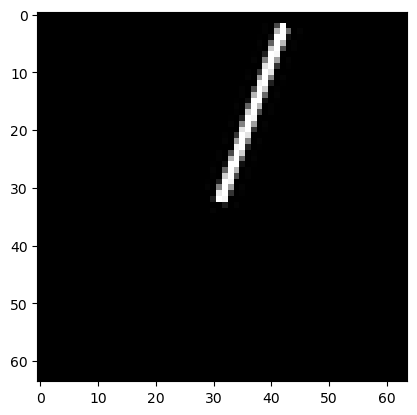

Prediction:


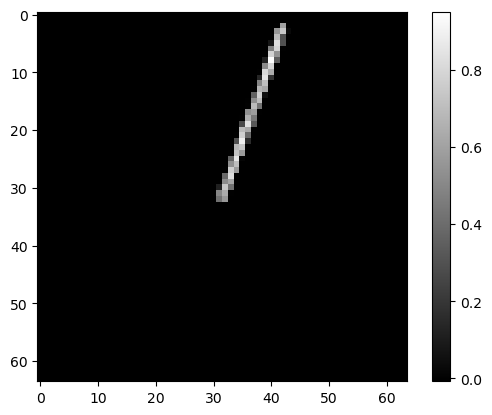

In [6]:
# testing
line = line_image(image_size)
print("Solution:")
plot_image(rotate_flat_image(line, -20), reshape=False)
print("Prediction:")
plot_image(model(line), colorbar=True)

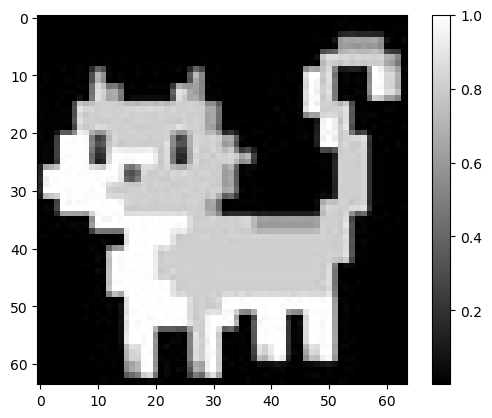

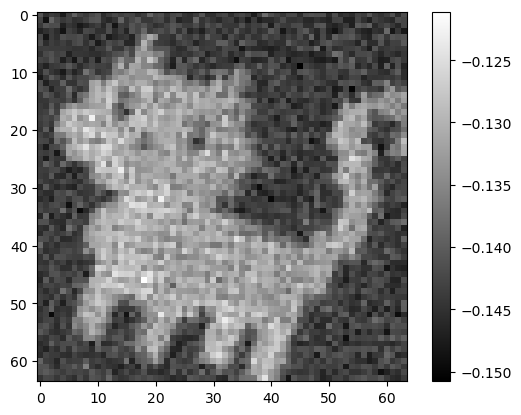

In [12]:
car = cat_image()
plot_image(car, colorbar=True)
plot_image(model(car), colorbar=True)

In [ ]:
weights = model.fc.weight.data.cpu().numpy()
plt.hist(weights.flatten(), bins=100)
plt.show()

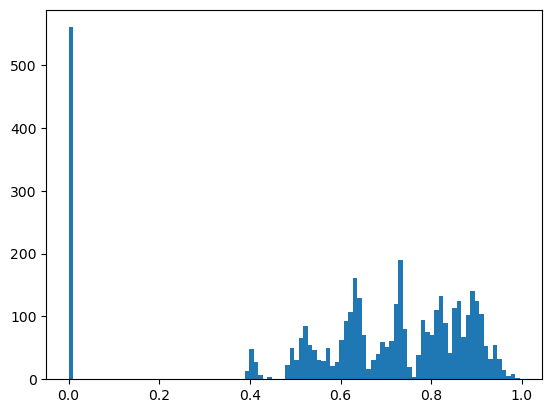

In [14]:
max_weights = weights.max(axis=1)
plt.hist(max_weights, bins=100)
plt.show()

In [10]:
model.load_state_dict(torch.load('model_clamped_leaky_relu.pth', weights_only=True))

<All keys matched successfully>

In [197]:
torch.save(model.state_dict(), 'model_clamped_leaky_relu.pth')